# Prueba Intertrimestral

**Nombre: Mario**  
**Apellidos: Godínez Chavero**  

**Tiempo de la prueba:** 2 horas  
**Asignatura:** Desarrollo de Aplicaciones para la Visualización de Datos  
**Fecha:** 16 de octubre de 2025  

## Instrucciones

- Escribe **código limpio y autoexplicativo**.  
- Se pueden utilizar **los materiales de clase**.  
- Se puede utilizar **internet** para búsqueda de dudas y documentación.  
- **No se puede utilizar ningún tipo de LLM** (ChatGPT, Copilot, Gemini, etc.).  
- **No se puede utilizar mensajería instantánea**.  
- Al finalizar, **sube tu notebook a GitHub** y envía el enlace del fichero en el siguiente formulario:  
[https://forms.office.com/e/LFVwu9z6uQ](https://forms.office.com/e/LFVwu9z6uQ)


## Dataset “Life Style Data”

El dataset contiene información sobre hábitos de vida (alimentación, sueño, ejercicio, consumo de tabaco o alcohol, etc.) y medidas de salud (IMC, presión arterial, etc.) para diferentes individuos.

Puedes descargarlo del repositorio de la asignatura y un .txt con la descripción de las variables.


## Inicialización de librerías

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, confusion_matrix


# Ejercicio 1 — Programación (2 puntos)

a) (0.6 pts) Crea una función imc(weight, height) que devuelva el índice de masa corporal (IMC), redondeado a dos decimales.



In [17]:
def masa_corporal(weight, height):
    """
    Fórmula: peso / (altura²)
    """
    return round(weight / (height ** 2), 2)

# Ejemplo con mi peso y altura
print(masa_corporal(60, 1.80))


18.52


b) (0.6 pts) Crea una función saludable(imcValue) que devuelva "Saludable" si el IMC está entre 18.5 y 24.9, "Bajo peso" si es menor de 18.5, o "Sobrepeso" si es mayor de 24.9.

In [20]:
def saludable(imcValue):
    """
    Bajo peso < 18.5 | Saludable 18.5–24.9 | Sobrepeso > 24.9
    """
    if imcValue < 18.5:
        return "Bajo peso"
    elif imcValue <= 24.9:
        return "Saludable"
    else:
        return "Sobrepeso"

# Ejemplo con saludable
print(saludable(18.52))


Saludable


c) (0.6 pts) Genera un DataFrame llamado imcData que contenga al menos 10 registros con las siguientes columnas:


*   peso (en kilogramos)

*   altura (en metros)

*   imc (calculado usando la función imc(weight, height) creada anteriormente)

Puedes generar los datos de peso y altura manualmente, mediante listas, o de forma aleatoria utilizando numpy (np.random.uniform o similar).

Añade una cuarta columna llamada categoria, cuyos valores provengan de la función saludable(imcValue).

Muestra las primeras filas del DataFrame resultante y comprueba que los tipos de datos son correctos.

In [16]:
# Datos aleatorios
np.random.seed(42)
pesos = np.random.uniform(50, 90, 10)
alturas = np.random.uniform(1.5, 1.9, 10)

# DataFrame
imcData = pd.DataFrame({
    "peso": pesos,
    "altura": alturas
})

imcData["imc"] = imcData.apply(lambda row: masa_corporal(row["peso"], row["altura"]), axis=1)
imcData["categoria"] = imcData["imc"].apply(saludable)

print(imcData.head())
print("\nTipos de datos:\n", imcData.dtypes)


        peso    altura    imc  categoria
0  64.981605  1.508234  28.57  Sobrepeso
1  88.028572  1.887964  24.70  Saludable
2  79.279758  1.832977  23.60  Saludable
3  73.946339  1.584936  29.44  Sobrepeso
4  56.240746  1.572730  22.74  Saludable

Tipos de datos:
 peso         float64
altura       float64
imc          float64
categoria     object
dtype: object


d) (0.2 pts) ¿Cómo podrías integrar ambas funciones dentro de una clase llamada HealthTools que calcule el IMC y clasifique automáticamente a partir de listas de pesos y alturas?

In [5]:
class HealthTools:
    def __init__(self, weights, heights):
        self.weights = weights
        self.heights = heights
        self.data = pd.DataFrame({"peso": weights, "altura": heights})

    def imc(self, w, h):
        return round(w / (h ** 2), 2)

    def saludable(self, imcValue):
        if imcValue < 18.5:
            return "Bajo peso"
        elif imcValue <= 24.9:
            return "Saludable"
        else:
            return "Sobrepeso"

    def calcular(self):
        self.data["imc"] = self.data.apply(lambda r: self.imc(r["peso"], r["altura"]), axis=1)
        self.data["categoria"] = self.data["imc"].apply(self.saludable)
        return self.data

# Ejemplo
ht = HealthTools(pesos, alturas)
print(ht.calcular())


        peso    altura    imc  categoria
0  64.981605  1.508234  28.57  Sobrepeso
1  88.028572  1.887964  24.70  Saludable
2  79.279758  1.832977  23.60  Saludable
3  73.946339  1.584936  29.44  Sobrepeso
4  56.240746  1.572730  22.74  Saludable
5  56.239781  1.573362  22.72  Saludable
6  52.323344  1.621697  19.90  Saludable
7  84.647046  1.709903  28.95  Sobrepeso
8  74.044600  1.672778  26.46  Sobrepeso
9  78.322903  1.616492  29.97  Sobrepeso


## Ejercicio 2 — Exploración y visualización (3 puntos)

a) (0.75 pts) Carga el dataset desde el fichero CSV y guárdalo en un DataFrame llamado lifeStyleData. Muestra las 5 primeras filas, el número de filas y columnas.

In [21]:
lifeStyleData = pd.read_csv("Final_data.csv")
print(lifeStyleData.head())
print("Filas y columnas:", lifeStyleData.shape)



     Age  Gender  Weight (kg)  Height (m)  Max_BPM  Avg_BPM  Resting_BPM  \
0  34.91    Male        65.27        1.62   188.58   157.65        69.05   
1  23.37  Female        56.41        1.55   179.43   131.75        73.18   
2  33.20  Female        58.98        1.67   175.04   123.95        54.96   
3  38.69  Female        93.78        1.70   191.21   155.10        50.07   
4  45.09    Male        52.42        1.88   193.58   152.88        70.84   

   Session_Duration (hours)  Calories_Burned Workout_Type  ...  \
0                      1.00          1080.90     Strength  ...   
1                      1.37          1809.91         HIIT  ...   
2                      0.91           802.26       Cardio  ...   
3                      1.10          1450.79         HIIT  ...   
4                      1.08          1166.40     Strength  ...   

   cal_from_macros  pct_carbs  protein_per_kg   pct_HRR  pct_maxHR  \
0          2139.59   0.500432        1.624789  0.741237   0.835985   
1     

b) (0.75 pts) Crea una función describeData(dataFrame) que devuelva para cada columna: tipo de dato, número de valores nulos y porcentaje de nulos.

In [34]:
def describeData(df):
    resultado = pd.DataFrame({
        "Tipo de dato": df.dtypes,
        "Valores nulos": df.isna().sum(),
        "% Nulos": round(df.isna().sum() / len(df) * 100, 2)
    })
    return resultado



c) (0.75 pts) Usa describeData(lifeStyleData) y comenta brevemente (2–3 líneas) qué variables parecen tener más valores faltantes.

In [35]:
describeData(lifeStyleData)


,Tipo de dato,Valores nulos,% Nulos
Age,float64,0,0.0
Gender,object,0,0.0
Weight (kg),float64,0,0.0
Height (m),float64,0,0.0
Max_BPM,float64,1,0.0
Avg_BPM,float64,1,0.0
Resting_BPM,float64,0,0.0
Session_Duration (hours),float64,0,0.0
Calories_Burned,float64,0,0.0
Workout_Type,object,0,0.0


Las variables maxBPM, avrBPN y colesterol_mg son las únicas variables que tienen valores nulos.
Esto puede deberse a omisiones en encuestas o registros.Pudiendose suponer el valor con algún promedio con el que haya relación entre las variables

d) (0.75 pts) Realiza un gráfico que muestre las correlaciones entre variables numéricas. ¿Hay alguna correlación fuerte o inesperada?

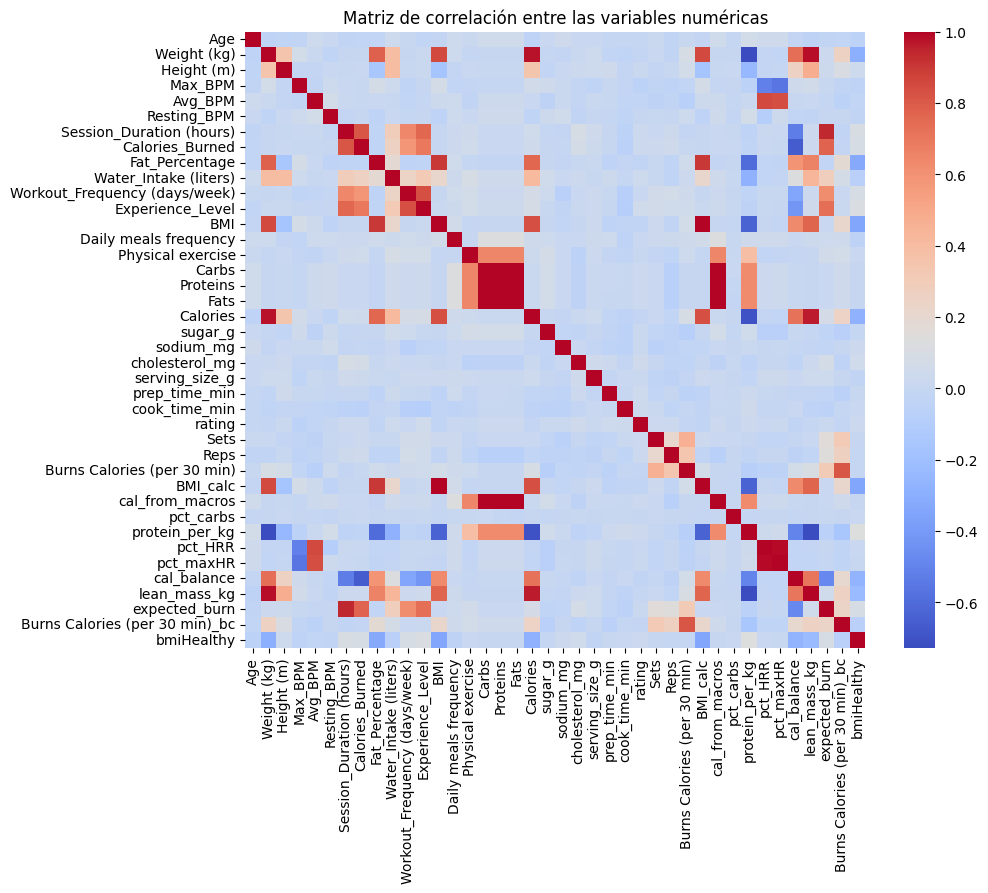

In [58]:
plt.figure(figsize=(10,8))
#sns.heatmap(lifeStyleData.corr(numeric_only=True), cmap="coolwarm", annot=True)
sns.heatmap(lifeStyleData.corr(numeric_only=True), cmap="coolwarm")
plt.title("Matriz de correlación entre las variables numéricas")
plt.show()


## Ejercicio 3 — Regresión básica (2 puntos)

Queremos predecir una variable de salud continua, por ejemplo bmi.

a) (0.25 pts) Define targetVar = "bmi" y selecciona 2–3 variables predictoras (por ejemplo sleepHours, activityLevel, calories). Guarda las columnas predictoras en X y la variable objetivo en y.

In [70]:
targetVar = "BMI"

X = lifeStyleData[["Age", "Fat_Percentage", "lean_mass_kg"]]
y = lifeStyleData[targetVar]




b) (0.25 pts) Divide los datos en entrenamiento (70 %) y prueba (30 %).

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)


c) (0.75 pts) Entrena un modelo de regresión lineal (LinearRegression) y calcula el R² y el MSE.

In [72]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

print("Linear Regression - R²:", round(r2_score(y_test, y_pred_lr), 3))
# Error cuadrático medio, cuanto menor sea el valor mejor es
print("Linear Regression - MSE:", round(mean_squared_error(y_test, y_pred_lr), 2))


Linear Regression - R²: 0.865
Linear Regression - MSE: 6.11


d) (0.75 pts) Entrena un RandomForestRegressor con los mismos datos y compara resultados. ¿Cuál tiene mejor rendimiento?

In [73]:
rf = RandomForestRegressor(random_state=123)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("Random Forest - R²:", round(r2_score(y_test, y_pred_rf), 3))
print("Random Forest - MSE:", round(mean_squared_error(y_test, y_pred_rf), 2))


"""
Tiene un mejor rendimuento el Random Forest tiene un mejor rendimiento predictivo, ya que
este puede hacer relaciones que no son lineales. Observando un mayor rndimiento predictivo en este.
"""


Random Forest - R²: 0.939
Random Forest - MSE: 2.75


'\nTiene un mejor rendimuento el Random Forest tiene un mejor rendimiento predictivo, ya que \neste puede capturar relaciones que no son lineales.\n'

## Ejercicio 4 — Clasificación sencilla (2 puntos)

Crea una nueva variable binaria que indique si el IMC está dentro del rango saludable.

a) (0.25 pts) Crea una nueva columna bmiHealthy donde el valor sea 1 si bmi está entre 18.5 y 24.9, y 0 en caso contrario.

In [90]:
lifeStyleData["bmiHealthy"] = ((lifeStyleData["BMI"] >= 18.5) & (lifeStyleData["BMI"] <= 24.9)).astype(int)


b) (0.75 pts) Entrena un modelo de regresión logística (LogisticRegression) para predecir bmiHealthy usando algunas variables de estilo de vida (por ejemplo sleepHours, activityLevel, calories).

In [97]:

X = lifeStyleData[["Daily meals frequency", "Calories", "Physical exercise"]]
y = lifeStyleData["bmiHealthy"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)


c) (0.25 pts) Calcula la exactitud (accuracy) del modelo y muestra la matriz de confusión.


In [98]:
acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print("Exactitud (accuracy):", round(acc, 3))
print("Matriz de confusión:\n", cm)


Exactitud (accuracy): 0.57
Matriz de confusión:
 [[2963  760]
 [1818  459]]


d) (0.75 pts) Explica qué variable parece influir más según el modelo.

In [99]:
coef = pd.Series(logreg.coef_[0], index=X.columns).sort_values(ascending=False)
print("Coeficientes del modelo:\n", coef)

"""
Las variables con coeficientes positivos aumentan la probabilidad de estar en lo que consideramos saludable de IMC.
Por ejemplo, el ejericio físico tiene una influencia positiva, mientras que un alto consumo de calories puede reducirlo.
Auque de igual forma podemos ver que la frecuencia de comidas diarias afecta de mayor manera negativamente.
"""

Coeficientes del modelo:
 Physical exercise        0.051481
Calories                -0.001188
Daily meals frequency   -0.118937
dtype: float64


'\nLas variables con coeficientes positivos aumentan la probabilidad de estar en lo que consideramos saludable de IMC.\nPor ejemplo, Burns Calories tiene una influencia positiva, mientras que un alto consumo de calories puede reducirlo. \nAuque de igual forma podemos ver que la frecuencia de comidas diarias afecta de mayor manera negativamente.\n'

## Ejercicio 5 — Conclusión (1 punto)

En un máximo de 300 palabras, resume:

*   Qué hábitos parecen tener mayor relación con el estado de salud.

*   Qué modelo fue más eficaz y por qué.

*   Qué podrías mejorar si tuvieras más tiempo o datos.



El análisis del dataset  permitió identificar los principales hábitos que influyen en la salud.

En el modelado predictivo, en la regresión lineal cdio resultados bastante buenos en cuanto a correlación entre variables, aunque el Random Forest logró un R² más alto y un menor MSE, viendo una mejor capacidad para obtener relaciones no lineales entre las variables.

En la clasificación con el modelo de regresión logistica mostro precisiones significativas entre las variables de estilo de vida y las medidas de salud. Las calorias y la actividad física (pyshical excercise) mostraron una relación con el bmiHealthy. Donde parece ser que las personas que comen y consumen más calorias esta asociado con un bajo IBMHealthy (la relación con el consumo de calorias es bajo), pero por otra parte las personas que hacen ejercicio físico se muestra que tiene una buena relación.

Por lo que los resultados indican que hacer ejercicio físico y una buena alimentación tiene un impacto  sobre la salud.

Donde el modelo de Regresión Logistica fue el que permitio visualizar de mejor manera que variables impactan y el cómo impctan (negativa o positivamente).

Con más tiempo o una mayor cantidad de datos, se podrían incluir variables como estrés, dieta para mejorar la precisión de los modelos y obtener una visión más completa de la salud de las personas.